In [3]:
import numpy as np
import math
import torch
from torch import nn
from torch import functional as F
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [282]:
torch.set_default_dtype(torch.float64)

In [284]:
mixture = [torch.distributions.normal.Normal(5.0, 0.5),
           torch.distributions.normal.Normal(-5.0, 1.5),
           torch.distributions.normal.Normal(2.0, 1.0)]
proportions = torch.tensor([0.05, 0.35, 0.6])

In [287]:
def logp(x):
    v = [None]*len(mixture)
    for j in range(len(mixture)):
        v[j] = mixture[j].log_prob(x) + proportions[j].log()
    return torch.logsumexp(torch.stack(v), dim=0)

<IPython.core.display.Javascript object>


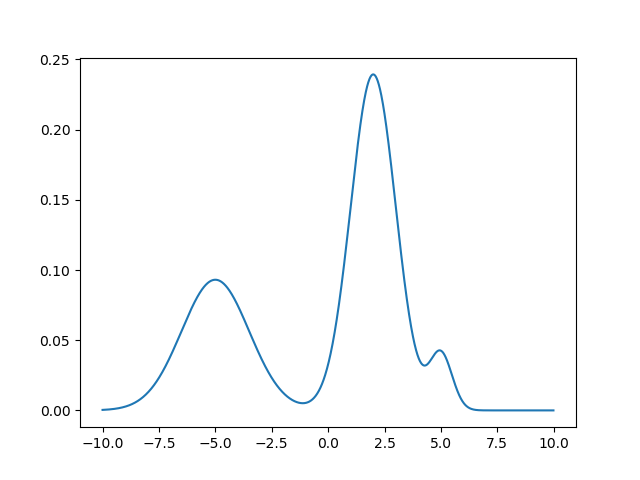

In [288]:
%matplotlib notebook
%matplotlib notebook

x_lin = torch.arange(-10, 10.0, 0.01).unsqueeze(-1)
plt.plot(x_lin.detach().cpu().numpy(), p(x_lin).exp().detach().cpu().numpy())
plt.show()

In [289]:
C = torch.distributions.categorical.Categorical(probs=proportions)

In [326]:
N = 100000
E = torch.tensor(0.0)
for _ in range(N):
    x = mixture[C.sample()].sample()
    E += logp(x)
E /= N
-E

tensor(2.3213)

In [150]:
import seaborn as sns, numpy as np

<IPython.core.display.Javascript object>


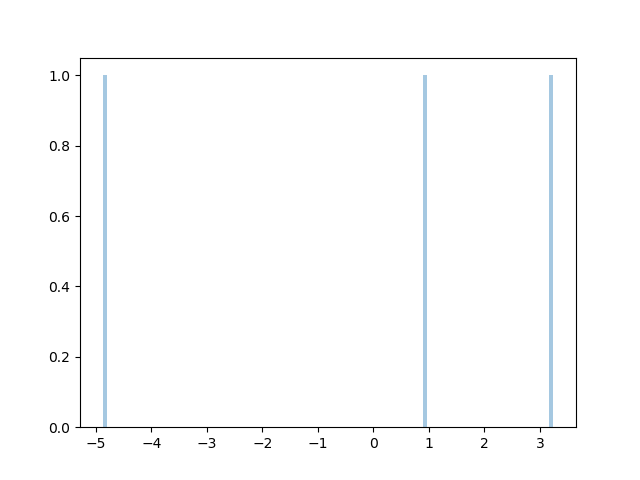

In [151]:
%matplotlib notebook
ax = sns.distplot(torch.stack(X).detach().numpy(), bins=100, kde=False)

In [192]:
from scipy.spatial.distance import squareform

In [422]:
N = 1000
X = []
for _ in range(N):
    X.append(mixture[C.sample()].sample())
X = torch.stack(X)

In [ ]:
X = X.double()

In [423]:
D = squareform(torch.nn.functional.pdist(X.unsqueeze(-1)))
np.fill_diagonal(D, np.inf)

In [ ]:
np.fill_diagonal(D, np.inf)

In [424]:
a = np.amin(D, axis=0)

In [427]:
D = squareform(torch.nn.functional.pdist(X.unsqueeze(-1)))
np.fill_diagonal(D, np.inf)
a = np.amin(D, axis=0)
np.sum(np.log(b*len(b)))/len(b) + np.log(2) + 0.57721

2.2426195535066125

In [ ]:
np.amax(a)